### Perkenalan

Nama    : I Made Dhanan Pradipta <br>


### Problem

Buatlah model Linear Regression untuk memprediksi biaya asuransi 

---
### Import Pustaka

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler #scaling dan encoding
from sklearn.model_selection import train_test_split #training data
from sklearn.linear_model import LinearRegression, LogisticRegression #modeling
from sklearn.metrics import classification_report, mean_absolute_error #evaluasi


---
### Data Loading

In [217]:
df_insurance = pd.read_csv('insurance.csv')

In [218]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [219]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [220]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [221]:
df_insurance.shape

(1338, 7)

Ket :

1.  dari inspeksi data loading, tidak terdapan missing value
2.  column berjumlah 6, dengan row sebanyak 1329

---
### EDA

In [222]:
#fungsi untuk membuat dataset tertentu yang nantinya divisualisasikan
def show_col(col):
    return df_insurance.groupby(col).size().reset_index(name="counts")

In [223]:
print('Rata-rata user :', df_insurance.age.mean())

Rata-rata user : 39.20702541106129


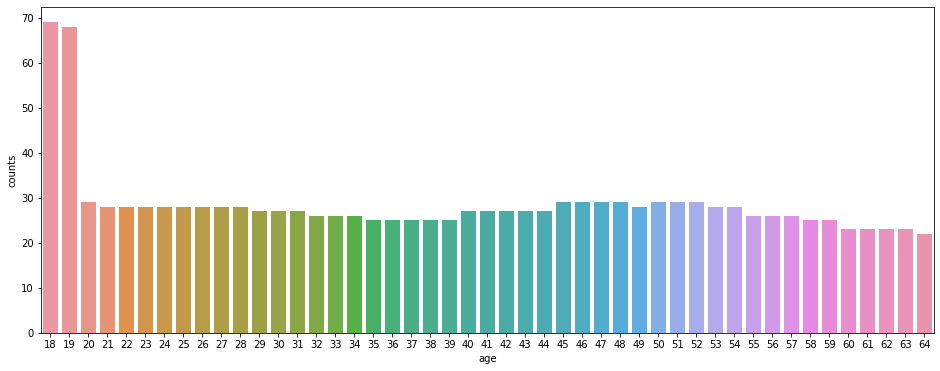

In [224]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="age", y="counts", data=show_col('age'))


      sex  counts
0  female     662
1    male     676


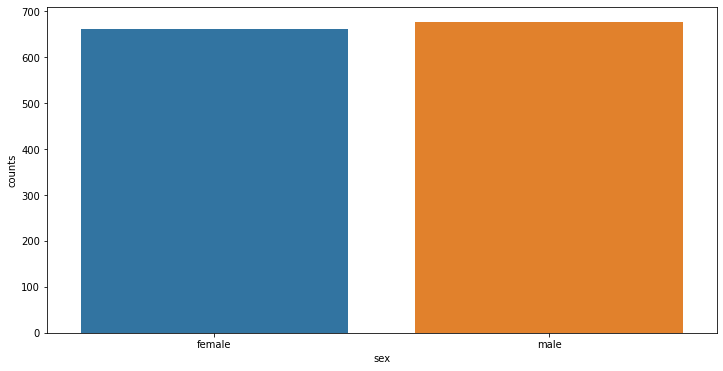

In [225]:
print(show_col('sex'))
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="sex", y="counts", data=show_col('sex'))

In [226]:
print('Rata-rata user :', df_insurance.bmi.mean())

Rata-rata user : 30.66339686098655


bmi       30.789406
counts     2.465677
dtype: float64


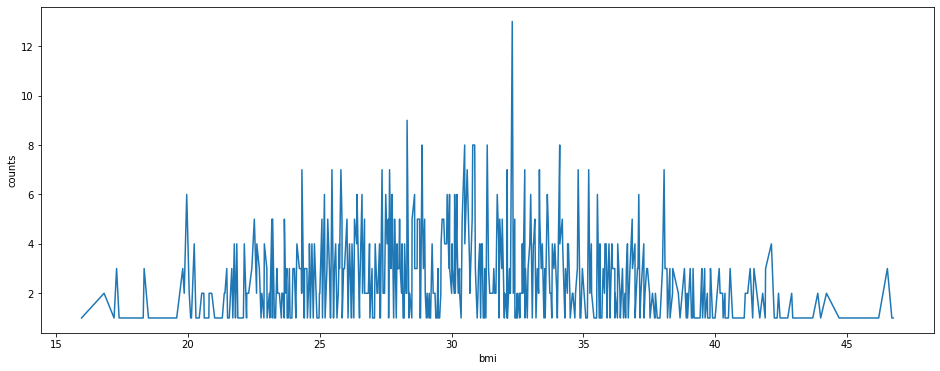

In [272]:
print(show_col('bmi').mean())
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="bmi", y="counts", data=show_col('bmi'))

In [228]:
show_col('children')

,children,counts
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


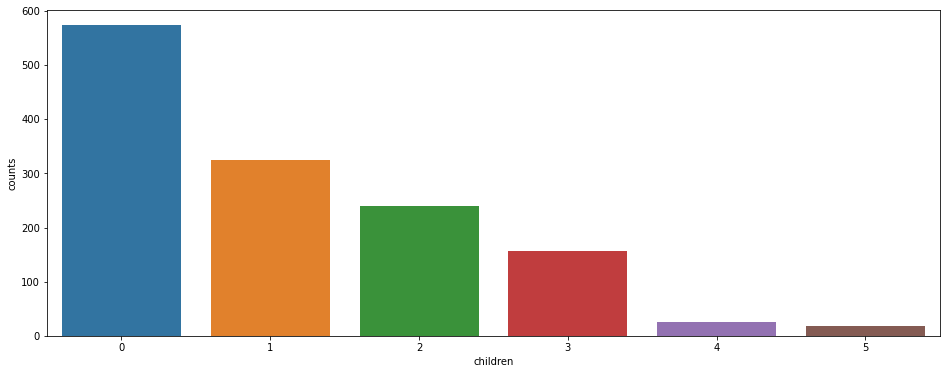

In [229]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="children", y="counts", data=show_col('children'))

  smoker  counts
0     no    1064
1    yes     274


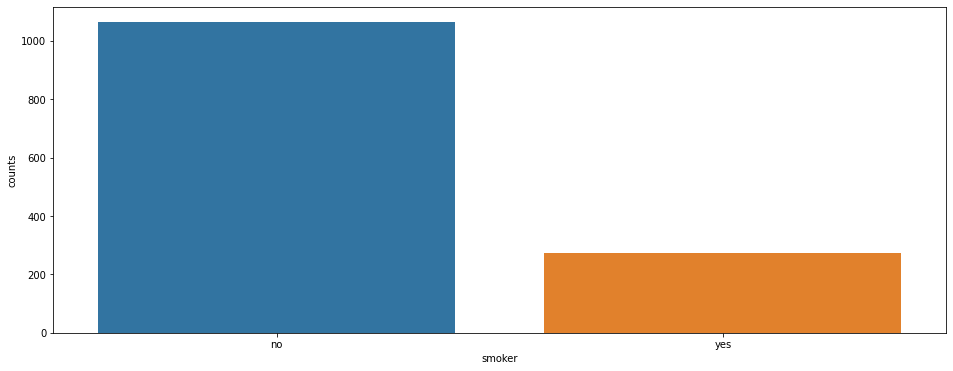

In [230]:
print(show_col('smoker'))
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="smoker", y="counts", data=show_col('smoker'))

      region  counts
0  northeast     324
1  northwest     325
2  southeast     364
3  southwest     325


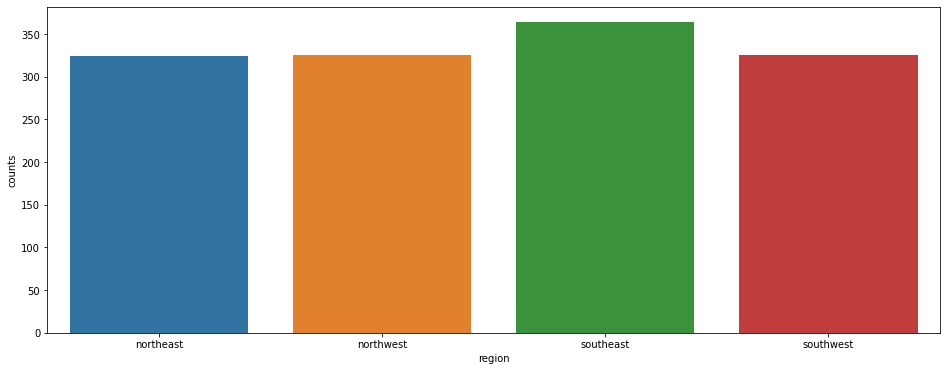

In [231]:
print(show_col('region'))
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="region", y="counts", data=show_col('region'))

#### Kesimpulan

1. rata-rata usia dari peserta asuransi yaitu 39 tahun, dengan usia tertinggi yaitu 18 dan 19 tahun dan usia terendah 64 tahun
2. peserta lebih banyak dari gender laki-laki dengan selisih 14 terhadap perempuan
3. pada nilai BMI (Body mass index), rata-rata peserta yaitu 30.7, terdapat data yang menarik bahwa nilai tertinggi bmi yaitu sekitar 46, karena normal bmi 18 - 25, ini diindikasi data tersebut adalah outlier
4. peserta paling banyak tidak memiliki anak (574 orang) dan paling sedikit memiliki 5 org anak (18 org)
5. peserta non perokok mendominasi terhadap peserta perokok dengan jumlah lebih dari 1000 org
6. alamat wilayah perserta terbagi rata menjadi 4 region, namun region southwest sedikit lebih banyak dibandingkan region lainya (364 org)

---
### Preprocessing

##### Langkah-Langkah :
1.  Buat korelasi antara feature dengan target
2.  drop feature yang tidak terdapat korelasi
3.  split data menjadi data training dan data test
4.  buat data inference 
5.  Handling missing value dan outlier

In [232]:
#bagi feature kedalam kolom numerikal dan categorical

cat_df = df_insurance[['sex', 'smoker', 'region', 'charges']]
num_df = df_insurance[['age', 'bmi', 'children', 'charges']]

#kolom kategorikal dilabel, supaya bisa dikorelasi
label = LabelEncoder()
for col in cat_df.select_dtypes(include='O').columns:
    cat_df[col]=label.fit_transform(cat_df[col])

C:\Users\danan\AppData\Local\Temp\ipykernel_17040\1586154153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[col]=label.fit_transform(cat_df[col])


In [233]:
#hasil labelencoder
cat_df

,sex,smoker,region,charges
0,0,1,3,16884.92400
1,1,0,2,1725.55230
2,1,0,2,4449.46200
3,1,0,1,21984.47061
4,1,0,1,3866.85520
...,...,...,...,...
1333,1,0,1,10600.54830
1334,0,0,0,2205.98080
1335,0,0,2,1629.83350
1336,0,0,3,2007.94500


<AxesSubplot:>

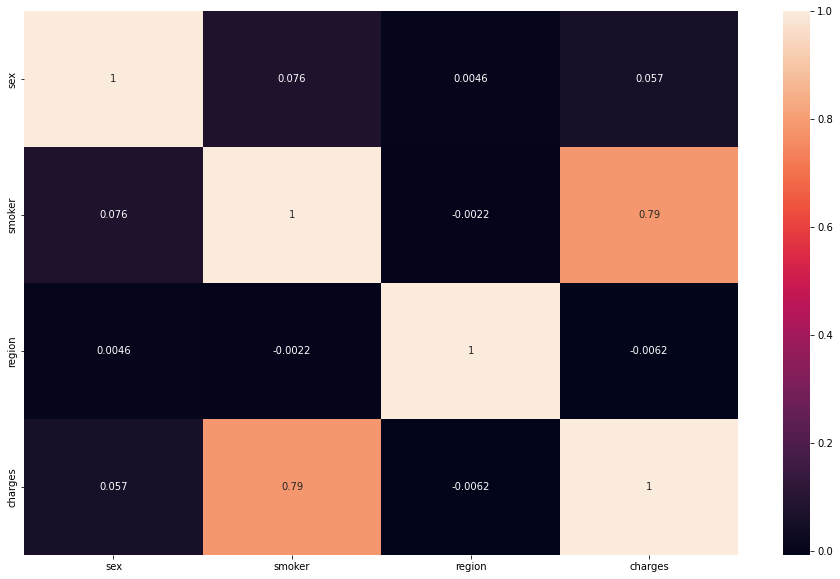

In [234]:
#buat visualisasi korelasi  ke kolom kategorikal menggunakan heatmap
plt.figure(figsize=(16,10))
sns.heatmap(cat_df.corr(),annot=True)

<AxesSubplot:>

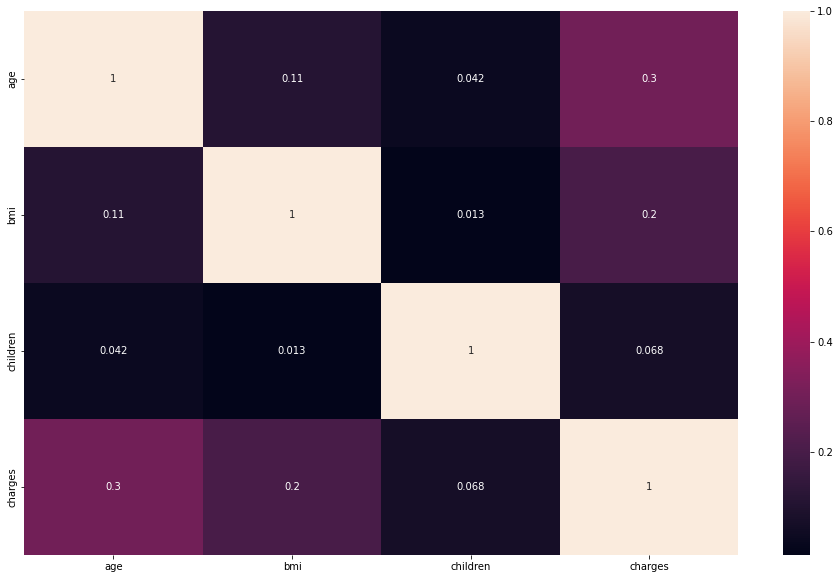

In [235]:
#buat visualisasi korelasi  ke kolom numerikal menggunakan heatmap
plt.figure(figsize=(16,10))
sns.heatmap(num_df.corr(),annot=True)

In [236]:
#drop kolom yang tidak terdapat korelasi dengan target
df_insurance = df_insurance.drop(['region'], axis=1)

##### Kesimpulan
1. setelah dicek korelasi antara kolom numerikal dengan target dan juga kolom categorikal dengan target, maka dapat disimpulkan bahwa feature _region_ tidak memiliki korelasi <br>
    dengan target (charges), maka dapat didrop

#### Split Dataset into training and test set

In [237]:
#split data menjadi training dan test data
X = df_insurance.drop('charges', axis=1)
y = df_insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17) # 0.2 = 20% datatest, 80% datatrain

print('Number of train Size :' , X_train.shape)
print('Number of test Size :' , X_test.shape)

Number of train Size : (1070, 5)
Number of test Size : (268, 5)


#### Handling Missing value

In [238]:
#cek missing value
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64
0
0


#### Handling Outlier

Text(0.5, 1.0, 'Histogram')

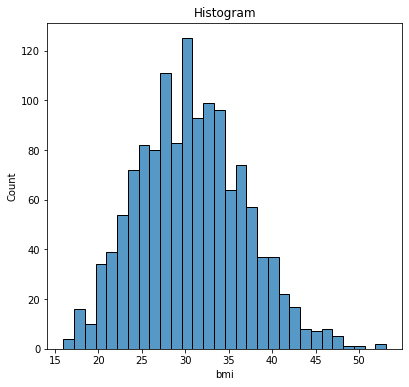

In [239]:
#cek distribusi dari dataset
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_insurance['bmi'], bins=30)
plt.title('Histogram')

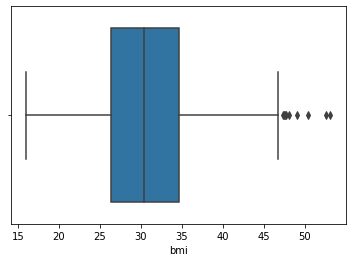

In [240]:
ax = sns.boxplot(x=df_insurance["bmi"])

In [241]:
q1 = np.quantile(df_insurance['bmi'], 0.25)
q3 = np.quantile(df_insurance['bmi'], 0.75)
iqr = q3 - q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

In [242]:
df_insurance = df_insurance[(df_insurance['bmi'] <= upper) & (df_insurance['bmi'] >= lower)]

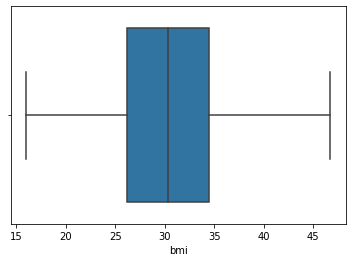

In [243]:
ax = sns.boxplot(x=df_insurance["bmi"])

##### Kesimpulan
1. Berdasarkan hasil diatas, maka dapat disimpulkan bahwa data training berjumlah 1070 dan data test berjumlah 268
2. tidak terdapat missing value
3. outlier hanya terdapat pada _bmi_ dan dilakukan drop outlier menggunakan metode iqr, karena distribusi skew ke kanan

In [244]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns :', num_columns)
print('Categorical Columns :', cat_columns)

Numerical Columns : ['age', 'bmi', 'children']
Categorical Columns : ['sex', 'smoker']


In [245]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

#### Feature Scalling

In [246]:
#sclling menggunakan StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num) 

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

Scalling dilakukan karena terdapat perbedaan value pada kolom yang terlalu jauh, sehingga perlu dilakukan proses scalling

#### Feature Encoding

In [247]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

Encoding dilakukan untuk memberikan nilai kepada kolom kategorikal

In [248]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final =  np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)

---
### Model Definition

In [249]:
#mode didefinisikan menggunakan linear regression
model_lin_reg = LinearRegression()

---
### Model Training

In [250]:
#model ditraining pada training set x dan y
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

---
### Model Prediction

In [251]:
#model diprediksi pada training dan data set
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

---
### Model evaluasi

In [252]:
print('Error-Train : ', mean_absolute_error(y_train, y_pred_train))
print('Error-Test : ', mean_absolute_error(y_test, y_pred_test))

Error-Train :  4243.909788353883
Error-Test :  3940.592081724263


Hasil Mean Absolute Error menunjukkan nilai rata-rata kesalahan multak atau absolut dari nilai sebenarnya dengan nilai peramalan, sehingga didapat dapat dibandingkan antara <br>
nilai error training dengan nilai error testnya

---
### Model Inference

In [253]:
data_inf = df_insurance.sample(10, random_state=17)
data_inf

,age,sex,bmi,children,smoker,charges
653,45,female,36.300,2,no,8527.53200
1108,26,male,30.000,1,no,2904.08800
1007,47,male,28.215,3,yes,24915.22085
18,56,male,40.300,0,no,10602.38500
823,44,female,29.810,2,no,8219.20390
151,48,male,29.700,0,no,7789.63500
1307,32,male,28.120,4,yes,21472.47880
115,60,male,28.595,0,no,30259.99556
739,29,male,35.500,2,yes,44585.45587
841,59,male,24.700,0,no,12323.93600


In [254]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat)

In [255]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final, columns=[num_columns + cat_columns])

In [256]:
y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Charges - Prediction'])

In [257]:
y_pred_inf_df

,Charges - Prediction
0,12178.600178
1,4846.581973
2,34707.410035
3,15177.216026
4,9863.700704
5,9818.019991
6,31345.471894
7,12440.894491
8,32178.574207
9,10952.476124


In [258]:
intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  8616.898538496554
Slope :  [ 3439.54938016  1949.11101892   463.29520211  -228.5975631
 24449.77113662]


Model Inference adalah model yang digunakan untuk mempelajari tentang proses pembuatan data model, tanpa menggunakan prediksi <br>
sehingga dalam mencari target dapat diintepretasikan : <br>

    charges = column * slope_column + intercept <br>

    charges = age * 3439.54 + sex * 1949.11 + bmi * 463.28 + children * -228.59 + smoker * 24449.77 + 8816

---
---
# Logistic Regression

### Problem
Buatlah model Logistic Regression untuk mengklasifikasikan tipe galaksi

---
### Data Loading

In [259]:
df_galaksi = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv')

In [260]:
df_galaksi.head()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [261]:
df_galaksi = df_galaksi.drop(['Unnamed: 0', 'TType', 'K'], axis=1)

In [262]:
df_galaksi

,C,A,S,G2,H,CNN2classes1stClass
0,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,0.446453,0.839216,0.801140,1.107665,0.610453,1
...,...,...,...,...,...,...
19995,0.358020,0.602471,0.832848,1.611594,0.735315,1
19996,0.470026,0.842624,0.868289,1.313089,0.649996,1
19997,0.323334,0.830340,0.950820,1.406042,0.671217,1
19998,0.393574,0.632766,0.825990,1.659363,0.379448,1


In [263]:
df_galaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   C                    20000 non-null  float64
 1   A                    20000 non-null  float64
 2   S                    20000 non-null  float64
 3   G2                   20000 non-null  float64
 4   H                    20000 non-null  float64
 5   CNN2classes1stClass  20000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 937.6 KB


---
### Preprocessing

In [264]:
X = df_galaksi.drop('CNN2classes1stClass', axis=1)
y = df_galaksi['CNN2classes1stClass']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=45)

#### Feature Scalling

In [265]:
#karna satuan yang beda jauh, maka dilakukan scaliing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
### Model Training

In [266]:
#modeling
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

---
### Model Prediction

In [267]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

---
### Model Evaluation

In [268]:
print('Classification report : ', classification_report(y_test,y_pred))

Classification report :                precision    recall  f1-score   support

           0       0.40      0.04      0.07       805
           1       0.80      0.99      0.88      3195

    accuracy                           0.80      4000
   macro avg       0.60      0.51      0.48      4000
weighted avg       0.72      0.80      0.72      4000



---
### Model Inference

In [274]:
data_inf_galaksi = df_galaksi.sample(10, random_state=17)

In [279]:
data_inf_galaksi = data_inf_galaksi.drop(['CNN2classes1stClass'], axis=1)

In [280]:
data_inf_galaksi_scaled = scaler.transform(data_inf_galaksi)

In [284]:
pred_inf_galaksi = model_lin_reg.predict(data_inf_galaksi_scaled)
pred_inf_galaksi_df = pd.DataFrame(pred_inf_galaksi, columns=['CNN - Prediction'])
pred_inf_galaksi_df

,CNN - Prediction
0,30924.486976
1,5754.079583
2,-16118.182230
3,-7475.155449
4,7811.568184
5,7731.931720
6,-5504.556997
7,-39961.212510
8,47985.436614
9,2458.184025


### Kesimpulan

1. Precision : akurasi dari positif predictions. berarti bahwa <br>
galaksi elips (0) memiliki 7% akurasi benar dari positif prediction <br>
galaksi spiral (1) memiliki 88% akurasi benar dari positif prediction

2.  Recall <br>
galaksi elips (0) memiliki 805 benar dari data yang berlabel positif <br>
galaksi spiral (1) memiliki 3195 benar dari data yang berlabel positif

3. Rata-rata akurasi dari Precision adalah 0.80
